# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en estructuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [2]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import pandas_datareader as web

In [4]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import matplotlib.pyplot as plt

Primero importaremos datos desde un archivo con extensión `.csv`

In [11]:
#Importar datos de un archivo csv
name = "WMT.csv"
datos = pd.read_csv(name)
datos

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023123,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023035,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.022772,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.022772,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.022422,870400
...,...,...,...,...,...,...,...
12149,2020-10-28,140.960007,142.130005,139.880005,140.039993,140.039993,5616400
12150,2020-10-29,140.000000,141.110001,138.699997,139.919998,139.919998,5051300
12151,2020-10-30,139.179993,140.089996,137.369995,138.750000,138.750000,6200600
12152,2020-11-02,140.589996,140.809998,139.029999,140.399994,140.399994,5525200


Ahora lo haremos desde Yahoo Finance

In [15]:
web.DataReader?

In [16]:
datos = web.DataReader('WMT','yahoo','1972-08-25','2020-11-03')
datos["Adj Close"]

Date
1972-08-25      0.023123
1972-08-28      0.023035
1972-08-29      0.022772
1972-08-30      0.022772
1972-08-31      0.022422
                 ...    
2020-10-28    140.039993
2020-10-29    139.919998
2020-10-30    138.750000
2020-11-02    140.399994
2020-11-03    142.779999
Name: Adj Close, Length: 12154, dtype: float64

In [19]:
# Escribir una función para generalizar la importación desde Yahoo
def get_closes(names,start,end):
    precios = web.DataReader(names,'yahoo',start,end)
    closes = precios["Adj Close"]    
    return closes

In [19]:
# Instrumentos a descargar 
names = ['BIMBOA.MX','AEROMEX.MX', 'GFAMSAA.MX']

# Fechas: inicios 2015 a finales de 2019
start = '2015-01-01'
end = '2020-11-03'

In [20]:
# Obtenemos los precios ajustados en el cierre
datos_MX = get_closes(names,start,end)
datos_MX

Symbols,BIMBOA.MX,AEROMEX.MX,GFAMSAA.MX
Date,,,
2015-01-02,38.051258,19.389999,11.670
2015-01-05,37.993843,20.030001,11.000
2015-01-06,37.716381,19.570000,11.330
2015-01-07,38.644463,19.430000,11.430
2015-01-08,39.247234,20.840000,11.540
...,...,...,...
2020-10-27,43.459999,4.110000,0.400
2020-10-28,42.779999,4.200000,0.391
2020-10-29,40.650002,4.220000,0.397


¿Cómo lucen estos datos?

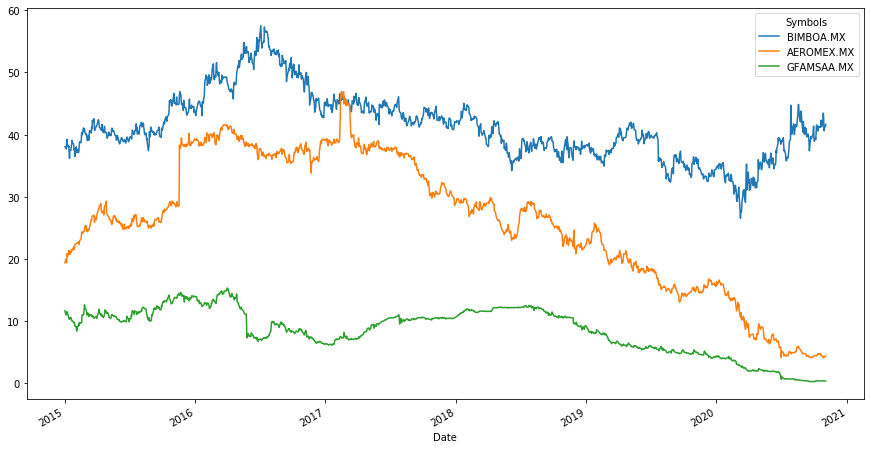

In [21]:
# Graficar
datos_MX.plot(figsize=(15,8))

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [22]:
# Método describe
datos_MX.describe()

Symbols,BIMBOA.MX,AEROMEX.MX,GFAMSAA.MX
count,1468.000000,1468.000000,1468.000000
mean,41.342703,26.225712,8.517056
std,5.375268,10.701337,3.735674
min,26.563566,4.110000,0.280000
25%,37.734069,18.817500,5.920000
50%,40.696760,26.755000,9.600000
75%,44.528836,36.912499,11.440000
max,57.545860,46.930000,15.340000


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [24]:
# Método shift
datos_MX.shift()

Symbols,BIMBOA.MX,AEROMEX.MX,GFAMSAA.MX
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,38.051258,19.389999,11.670
2015-01-06,37.993843,20.030001,11.000
2015-01-07,37.716381,19.570000,11.330
2015-01-08,38.644463,19.430000,11.430
...,...,...,...
2020-10-27,42.400002,4.380000,0.400
2020-10-28,43.459999,4.110000,0.400
2020-10-29,42.779999,4.200000,0.391


In [29]:
# Entonces los rendimientos se calculan como
ret_MX = (datos_MX - datos_MX.shift())/datos_MX.shift()
ret_MX = ret_MX.dropna()
ret_MX

Symbols,BIMBOA.MX,AEROMEX.MX,GFAMSAA.MX
Date,,,
2015-01-05,-0.001509,0.033007,-0.057412
2015-01-06,-0.007303,-0.022966,0.030000
2015-01-07,0.024607,-0.007154,0.008826
2015-01-08,0.015598,0.072568,0.009624
2015-01-09,-0.019503,-0.021113,-0.014731
...,...,...,...
2020-10-27,0.025000,-0.061644,0.000000
2020-10-28,-0.015647,0.021898,-0.022500
2020-10-29,-0.049790,0.004762,0.015345


In [28]:
# Método pct_change
datos_MX.pct_change().dropna()

Symbols,BIMBOA.MX,AEROMEX.MX,GFAMSAA.MX
Date,,,
2015-01-05,-0.001509,0.033007,-0.057412
2015-01-06,-0.007303,-0.022966,0.030000
2015-01-07,0.024607,-0.007154,0.008826
2015-01-08,0.015598,0.072568,0.009624
2015-01-09,-0.019503,-0.021113,-0.014731
...,...,...,...
2020-10-27,0.025000,-0.061644,0.000000
2020-10-28,-0.015647,0.021898,-0.022500
2020-10-29,-0.049790,0.004762,0.015345


y la gráfica de los rendimientos se puede obtener como...

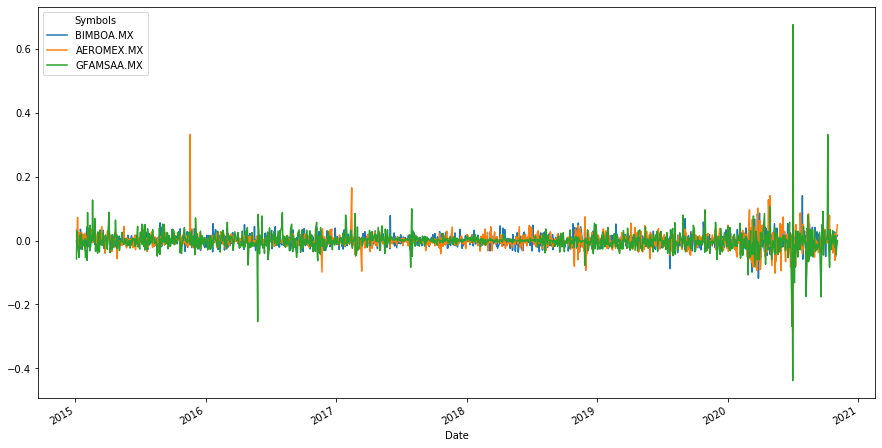

In [30]:
# Gráfica
ret_MX.plot(figsize=(15,8))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [31]:
# Rendimiento logarítmico
ret_log = np.log(datos_MX/datos_MX.shift())
ret_log

Symbols,BIMBOA.MX,AEROMEX.MX,GFAMSAA.MX
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.001510,0.032474,-0.059126
2015-01-06,-0.007330,-0.023233,0.029559
2015-01-07,0.024309,-0.007179,0.008787
2015-01-08,0.015477,0.070056,0.009578
...,...,...,...
2020-10-27,0.024693,-0.063626,0.000000
2020-10-28,-0.015770,0.021661,-0.022757
2020-10-29,-0.051072,0.004751,0.015229


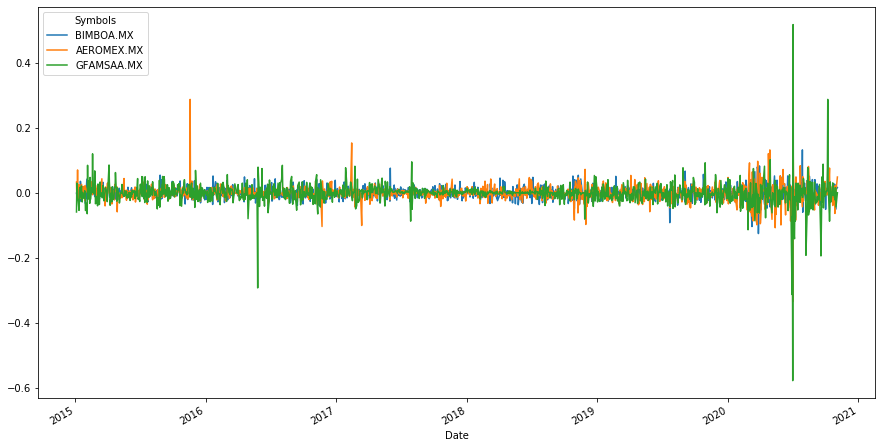

In [32]:
# Gráfica
ret_log.plot(figsize=(15,8))

In [17]:
# Valor absoluto de la diferencia


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [35]:
# Media y volatilidad de rendimientos
ret_MX.mean()['BIMBOA.MX']

0.00022764185801719532

In [36]:
ret_MX.std()

Symbols
BIMBOA.MX     0.018266
AEROMEX.MX    0.024488
GFAMSAA.MX    0.034789
dtype: float64

In [37]:
ret_MX.std()['GFAMSAA.MX']

0.03478894221880014

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>